<div style="height:300;background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h1>Logistic regression on: ID_2 and ID_44</h1>
    <h2></h2>
    <hr>
    <h3>By: Gari Ciodaro Guerra</h3>
</div>

In [1]:


#Requiered libs
import pandas as pd
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind,bartlett
import seaborn as sns
import os
#from xgboost import XGBClassifier
#from xgboost import plot_importance
import pandas as pd
import graphviz
import xgboost as xgb
import imageio

#Set general style of plots(optional)
#mpl.style.use(['ggplot'])

import sys

path_to_class="/home/gari/Desktop/master_tesis_v3/MLDiagnosisTool/Classes/"
sys.path.append(path_to_class)
from OFHandlers import OFHandlers as OFH

In [2]:
df_train_id_44=OFH.load_object("./combined/df_train_id_44.file")
df_train_id_2=OFH.load_object("./combined/df_train_id_2.file")
path_to_train="./ID_2/Datasets_delta_theta/prepared_train_data_set.file"
data_target=OFH.load_object(path_to_train)[["target"]]
path_identity="/home/gari/Desktop/master_tesis_v3/Data/IdDataSet/"
df_train_identity=OFH.load_object(path_identity+"df_train_identity.file")
df_train=df_train_id_2.join(df_train_id_44).join(data_target).join(df_train_identity)
df_train=df_train.groupby("train_patient_id").mean()

In [3]:
y=df_train[["target"]]
X=df_train[["id_2_predictions","id_44_predictions"]]

In [4]:
X["avg_pre"]=(X.id_2_predictions+X.id_44_predictions)/2

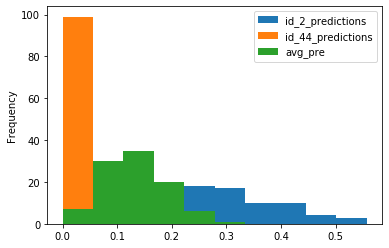

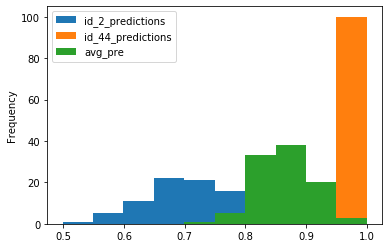

In [92]:

X['des'] = X['avg_pre'].apply(lambda x: 1 if x>=0.5 else 0)
X

for label,data in X.groupby('des'):
    data[["id_2_predictions","id_44_predictions","avg_pre"]].plot(kind="hist")

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5,random_state=42).fit(X, y)

/home/gari/anaconda3/envs/EEG/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
clf.coef_

array([[0.01730931, 0.03783796, 0.02757364]])

In [50]:
clf.coef_

array([[0.12475878, 0.27334187]])

In [7]:
test=pd.read_csv("./combined/combined.csv")

In [95]:

test["avg_pre"]=(test.Predicted_Target_2+test.Predicted_Target_44)/2

0
1


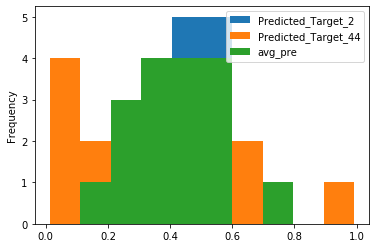

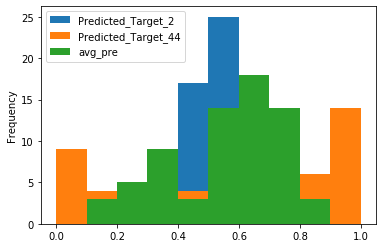

In [101]:


for labe,df in test.groupby("target"):
    print(labe)
    df[["Predicted_Target_2","Predicted_Target_44", "avg_pre"]].plot(kind='hist')
    

In [32]:
from sklearn.metrics import (roc_auc_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             average_precision_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             roc_curve)

In [43]:
f1_score_c=f1_score(test.target, y_pre)
acc_score_c=accuracy_score(test.target, y_pre)
recall_score_c=recall_score(test.target, y_pre)
precision_score_c=precision_score(test.target, y_pre)

#jus accu	f1_score_	recall___	precision
acc_score_c,f1_score_c,recall_score_c,precision_score_c

(0.7093023255813954, 0.81203007518797, 0.782608695652174, 0.84375)

In [5]:


subjects_12=OFH.load_object("/home/gari/Desktop/master_tesis_v3/NoteBooks/experiment_mass_analysis/subjects_12.file")

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

final_test=test.set_index("subjects")[["target","Predicted_Target_44","Predicted_Target_2"]]
final_test

,target,Predicted_Target_44,Predicted_Target_2
subjects,,,
NDARAA117NEJ,1,0.720940,0.728183
NDARAY238DFL,1,0.174685,0.600490
NDARBM839WR5,1,0.850604,0.533420
NDARBV364MBC,1,0.979891,0.243141
NDARCB370UK4,1,0.186022,0.345616
NDARCJ475WJP,1,0.000402,0.338050
NDARCR499NE4,1,0.458474,0.549935
NDARCT933HF2,1,0.712361,0.493994
NDARCW497XW2,1,0.994647,0.502900


In [157]:
#Age
#pheno=subjects_12[["Sex","BMI_Range","Age"]].fillna("empty").loc[final_test.index]
pheno=subjects_12[["Age"]].fillna("empty").loc[final_test.index]

#est = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
#est_df=pd.DataFrame(est.fit_transform(pheno[["Age"]]),index=pheno.index,columns=["age1","age2","age3"])

est_p44 = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
est_p44_df=pd.DataFrame(est_p44.fit_transform(final_test[["Predicted_Target_44"]]),
                        index=pheno.index,columns=["p-44"])

est_p2 = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
est_p2_df=pd.DataFrame(est_p2.fit_transform(final_test[["Predicted_Target_2"]]),
                      index=pheno.index,columns=["p-2"])

pheno=pheno.drop(["Age"],axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enconded=pd.DataFrame(enc.fit_transform(pheno),index=pheno.index)
#pheno_final=enconded.join(subjects_12[["Age"]]).join(final_test)
#pheno_final=enconded.join(final_test).join(est_df).join(est_p44_df).join(est_p2_df).drop(["Predicted_Target_44",
#                                                                                          "Predicted_Target_2"],
#                                                                                        axis=1)
pheno_final=enconded.join(final_test).join(est_p44_df).join(est_p2_df).drop(["Predicted_Target_44",
                                                                                          "Predicted_Target_2"],
                                                                                        axis=1)
pheno_final

,target,p-44,p-2
subjects,,,
NDARAA117NEJ,1,4.0,4.0
NDARAY238DFL,1,1.0,3.0
NDARBM839WR5,1,5.0,2.0
NDARBV364MBC,1,5.0,0.0
NDARCB370UK4,1,1.0,0.0
NDARCJ475WJP,1,0.0,0.0
NDARCR499NE4,1,2.0,2.0
NDARCT933HF2,1,4.0,2.0
NDARCW497XW2,1,5.0,2.0


In [ ]:
est_p44 = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')
est_p44_df=pd.DataFrame(est_p44.fit_transform(final_test[["Predicted_Target_44"]]),
                        index=pheno.index,columns=["healthy-44",
                                                   "mild-44",
                                                   "adhd-44",
                                                   "severe-44"])

est_p2 = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')
est_p2_df=pd.DataFrame(est_p2.fit_transform(final_test[["Predicted_Target_2"]]),
                      index=pheno.index,columns=["healthy-2",
                                               "mild-2",
                                               "adhd-2",
                                               "severe-2"])

In [58]:
import networkx as nx
from numpy import linalg as LA

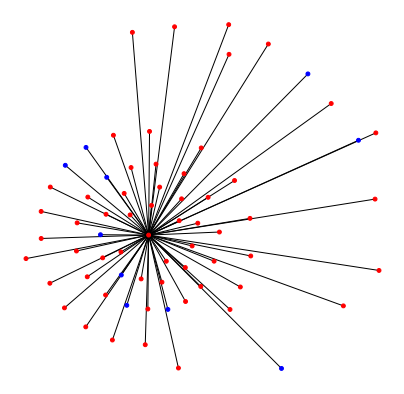

In [233]:
from sklearn.metrics import jaccard_score
from scipy.spatial import distance as dp
G = nx.Graph()
colors=[]
nodes_pos={}
i=0
for each in pheno_final.index:
    row1=pheno_final2.loc[each]
    row2=pheno_final2.loc[each]
    target=pheno_final.loc[each]
    if row1["p-2"]>=0.5:
        pre_id2=1
    if row1["p-2"]<0.5:
        pre_id2=0
        
    if row2["p-44"]>=0.5:
        pre_id44=1
    if row2["p-44"]<0.5:
        pre_id44=0
    if pre_id44==pre_id2:
        #print(pre_id44,pre_id2,)
        if target.target == 0:
            G.add_node(each)
            colors.append("blue")
        else:
            nodes_pos[each]=i,i
            G.add_node(each)
            colors.append("red")
        i=i+0.1
        
pheno_final2=pheno_final.drop(["target"], axis=1)

hold_each=[]
for each1 in pheno_final2.index:
    row1=pheno_final2.loc[each1]
    row2=pheno_final2.loc[each1]
    target=pheno_final.loc[each1]
    
    #distance=((LA.norm(row1-row2)-mean_d)/(max_d-min_d))+1
    #jaccard_score(row1,row2)
    #print(row1,row2)
    #d=dp.jaccard(row1,row2)
    d=abs(row1["p-2"]-row2["p-44"])+0.1
    #print(row1["p-2"],row2["p-44"],d)
    #print("D",d)
    #dist.append(distance)
    #a similrity bigget than 70%
    #if d<=2:
    #    print("d",d+1)
    if row1["p-2"]>=0.5:
        pre_id2=1
    if row1["p-2"]<0.5:
        pre_id2=0
        
    if row2["p-44"]>=0.5:
        pre_id44=1
    if row2["p-44"]<0.5:
        pre_id44=0
    if pre_id44==pre_id2:
        G.add_edge(each1,each2,weight=d)


fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
pos = nx.spring_layout(G,scale=1.0,k=0.5)
#nx.draw_networkx_nodes(G, pos)
nx.draw(G, pos, node_size=15,ax=ax,node_color = colors)
#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)
plt.show() 

In [238]:
from sklearn.metrics import jaccard_score
from scipy.spatial import distance as dp
G = nx.Graph()
colors=[]
nodes_pos={}
i=0
for each in pheno_final.index:
    row1=pheno_final2.loc[each]
    row2=pheno_final2.loc[each]
    target=pheno_final.loc[each]
    if row1["p-2"]>=0.5:
        pre_id2=1
    if row1["p-2"]<0.5:
        pre_id2=0
        
    if row2["p-44"]>=0.5:
        pre_id44=1
    if row2["p-44"]<0.5:
        pre_id44=0
    if pre_id44!=pre_id2:
        #print(pre_id44,pre_id2,)
        if target.target == 0:
            G.add_node(each)
            colors.append("blue")
        else:
            nodes_pos[each]=i,i
            G.add_node(each)
            colors.append("red")
        i=i+0.1
        
pheno_final2=pheno_final.drop(["target"], axis=1)

hold_each=[]
for each1 in pheno_final2.index:
    row1=pheno_final2.loc[each1]
    row2=pheno_final2.loc[each1]
    target=pheno_final.loc[each1]
    
    #distance=((LA.norm(row1-row2)-mean_d)/(max_d-min_d))+1
    #jaccard_score(row1,row2)
    #print(row1,row2)
    #d=dp.jaccard(row1,row2)
    d=abs(row1["p-2"]-row2["p-44"])+0.1
    #print(row1["p-2"],row2["p-44"],d)
    #print("D",d)
    #dist.append(distance)
    #a similrity bigget than 70%
    #if d<=2:
    #    print("d",d+1)
    if row1["p-2"]>=0.5:
        pre_id2=1
    if row1["p-2"]<0.5:
        pre_id2=0
        
    if row2["p-44"]>=0.5:
        pre_id44=1
    if row2["p-44"]<0.5:
        pre_id44=0
    if pre_id44==pre_id2:
        G.add_edge(each1,each2,weight=d)


fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
pos = nx.spring_layout(G,scale=1.0,k=0.5)
#nx.draw_networkx_nodes(G, pos)
nx.draw(G, pos, node_size=15,ax=ax,node_color = colors)
#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)
plt.show() 

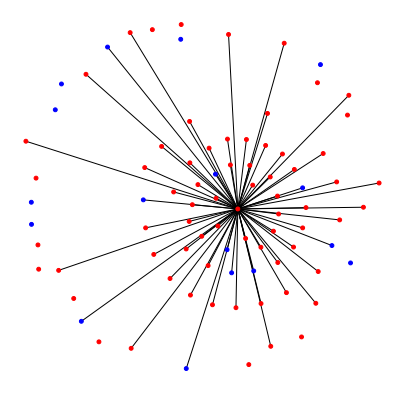

In [221]:
from sklearn.metrics import jaccard_score
from scipy.spatial import distance as dp
G = nx.Graph()
colors=[]
nodes_pos={}
i=0
for each in pheno_final.index:
    row=pheno_final.loc[each]
    if row.target == 0:
        G.add_node(each)
        colors.append("blue")
    else:
        nodes_pos[each]=i,i
        G.add_node(each)
        colors.append("red")
    i=i+0.1


        
pheno_final2=pheno_final.drop(["target"], axis=1)

hold_each=[]
for each1 in pheno_final2.index:
    row1=pheno_final2.loc[each1]
    row2=pheno_final2.loc[each1]
    target=pheno_final.loc[each1]
    
    #distance=((LA.norm(row1-row2)-mean_d)/(max_d-min_d))+1
    #jaccard_score(row1,row2)
    #print(row1,row2)
    #d=dp.jaccard(row1,row2)
    d=abs(row1["p-2"]-row2["p-44"])+0.1
    #print(row1["p-2"],row2["p-44"],d)
    #print("D",d)
    #dist.append(distance)
    #a similrity bigget than 70%
    #if d<=2:
    #    print("d",d+1)
    if row1["p-2"]>=0.5:
        pre_id2=1
    if row1["p-2"]<0.5:
        pre_id2=0
        
    if row2["p-44"]>=0.5:
        pre_id44=1
    if row2["p-44"]<0.5:
        pre_id44=0
    if pre_id44==pre_id2:
        G.add_edge(each1,each2,weight=d)

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
pos = nx.spring_layout(G,scale=1.0,k=0.5)
#nx.draw_networkx_nodes(G, pos)
nx.draw(G, pos, node_size=15,ax=ax,node_color = colors)
#nx.draw_circular(G,font_size=7, with_labels=False,node_color = colors,node_size=50)
plt.show() 

In [197]:
pheno_final[pheno_final["target"]==0]

,target,p-44,p-2
subjects,,,
NDARDR296XHN,0,0.0,1.0
NDAREM703YFD,0,0.0,1.0
NDARFK610GY5,0,0.0,3.0
NDARJH441HJD,0,3.0,1.0
NDARJV377HG4,0,0.0,3.0
NDARKT811ATJ,0,2.0,3.0
NDARMD575AXD,0,2.0,2.0
NDARPW482TVE,0,5.0,2.0
NDARRB338YZ0,0,2.0,2.0


In [203]:
test[test["target"]==0]

,subjects,Predicted_Target_2,Predicted_Target_44,target
10,NDARDR296XHN,0.416116,0.055396,0
16,NDAREM703YFD,0.398593,0.012952,0
21,NDARFK610GY5,0.585299,0.121004,0
33,NDARJH441HJD,0.395876,0.659357,0
35,NDARJV377HG4,0.674202,0.022220,0
39,NDARKT811ATJ,0.580590,0.437413,0
43,NDARMD575AXD,0.479244,0.366779,0
51,NDARPW482TVE,0.565917,0.992350,0
52,NDARRB338YZ0,0.579454,0.414825,0
53,NDARRV480PU1,0.428953,0.034589,0


In [69]:
from scipy.spatial import distance
distance.jaccard([1, 0, 0], [1, 0, 0])

0.0

In [ ]:
dist=[]
pheno_final2=pheno_final.drop(["target"], axis=1)
for each1 in pheno_final2.index:
    row1=pheno_final.loc[each1]
    for each2 in pheno_final2.index:
        row2=pheno_final.loc[each2]
        distance=LA.norm(row1-row2)
        dist.append(distance)
        #G.add_edge(each1,each2,weight=distance)
mean_d=np.mean(dist)
max_d=np.max(dist)
min_d=np.min(dist)